In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

In [4]:
# Load data
file_path = '/content/drive/MyDrive/Major Project_1 (UR3_Robot)/Dataset /dataset_02052023.xlsx'
df = pd.read_excel(file_path, sheet_name='data')
df.head()

,Num,Timestamp,Current_J0,Temperature_T0,Current_J1,Temperature_J1,Current_J2,Temperature_J2,Current_J3,Temperature_J3,...,Speed_J0,Speed_J1,Speed_J2,Speed_J3,Speed_J4,Speed_J5,Tool_current,cycle,Robot_ProtectiveStop,grip_lost
0,1,2022-10-26T08:17:21.847Z,0.109628,27.875,-2.024669,29.3750,-1.531442,29.3750,-0.998570,32.1250,...,2.955651e-01,-0.000490,0.001310,-0.132836,-0.007479,-0.152962,0.082732,1,0.0,False
1,2,2022-10-26T08:17:22.852Z,0.595605,27.875,-2.278456,29.3125,-0.866556,29.4375,-0.206097,32.1875,...,-7.391485e-30,-0.000304,0.002185,0.001668,-0.000767,0.000417,0.505895,1,0.0,False
2,3,2022-10-26T08:17:23.857Z,-0.229474,27.875,-2.800408,29.3125,-2.304336,29.4375,-0.351499,32.1250,...,1.369386e-01,0.007795,-2.535874,0.379867,0.000455,-0.496856,0.079420,1,0.0,False
3,4,2022-10-26T08:17:24.863Z,0.065053,27.875,-3.687768,29.3125,-1.217652,29.4375,-1.209115,32.1250,...,-9.030032e-02,-0.004911,-0.009096,-0.384196,0.018411,0.425559,0.083325,1,0.0,False
4,5,2022-10-26T08:17:25.877Z,0.884140,27.875,-2.938830,29.3750,-1.794076,29.4375,-2.356471,32.1875,...,1.268088e-01,0.005567,0.001138,-0.353284,0.014994,0.180989,0.086379,1,0.0,False


In [5]:
from sklearn.preprocessing import StandardScaler
# Drop non-numeric columns
data_clean = df.drop(columns=['Num', 'Timestamp', 'grip_lost'])

In [6]:
data_clean

,Current_J0,Temperature_T0,Current_J1,Temperature_J1,Current_J2,Temperature_J2,Current_J3,Temperature_J3,Current_J4,Temperature_J4,...,Temperature_J5,Speed_J0,Speed_J1,Speed_J2,Speed_J3,Speed_J4,Speed_J5,Tool_current,cycle,Robot_ProtectiveStop
0,0.109628,27.8750,-2.024669,29.3750,-1.531442,29.3750,-0.998570,32.1250,-0.062540,32.2500,...,32.0000,2.955651e-01,-0.000490,0.001310,-0.132836,-0.007479,-0.152962,0.082732,1,0.0
1,0.595605,27.8750,-2.278456,29.3125,-0.866556,29.4375,-0.206097,32.1875,-1.062762,32.2500,...,32.0000,-7.391485e-30,-0.000304,0.002185,0.001668,-0.000767,0.000417,0.505895,1,0.0
2,-0.229474,27.8750,-2.800408,29.3125,-2.304336,29.4375,-0.351499,32.1250,-0.668869,32.3125,...,32.0625,1.369386e-01,0.007795,-2.535874,0.379867,0.000455,-0.496856,0.079420,1,0.0
3,0.065053,27.8750,-3.687768,29.3125,-1.217652,29.4375,-1.209115,32.1250,-0.819755,32.2500,...,32.0000,-9.030032e-02,-0.004911,-0.009096,-0.384196,0.018411,0.425559,0.083325,1,0.0
4,0.884140,27.8750,-2.938830,29.3750,-1.794076,29.4375,-2.356471,32.1875,-0.966427,32.3125,...,32.0000,1.268088e-01,0.005567,0.001138,-0.353284,0.014994,0.180989,0.086379,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7404,-0.109017,37.1875,-2.261695,40.3125,-1.082678,40.6875,-0.494714,43.3750,-0.019447,45.2500,...,44.5625,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.080013,264,0.0
7405,-0.098536,37.1875,-2.251992,40.3125,-1.094420,40.6875,-0.515789,43.3750,-0.009186,45.2500,...,44.5000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.078740,264,0.0
7406,-0.121100,37.1875,-2.280791,40.2500,-1.121319,40.6875,-0.502406,43.3750,-0.002978,45.2500,...,44.5000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.091471,264,0.0
7407,-0.129370,37.1875,-2.269061,40.3125,-1.091610,40.6250,-0.491158,43.3750,-0.001136,45.2500,...,44.5625,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.090026,264,0.0


In [7]:
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clean)

In [8]:
# Convert the scaled data back into a DataFrame for easier handling
data_scaled_df = pd.DataFrame(data_scaled, columns=data_clean.columns)
data_scaled_df.head()

,Current_J0,Temperature_T0,Current_J1,Temperature_J1,Current_J2,Temperature_J2,Current_J3,Temperature_J3,Current_J4,Temperature_J4,...,Temperature_J5,Speed_J0,Speed_J1,Speed_J2,Speed_J3,Speed_J4,Speed_J5,Tool_current,cycle,Robot_ProtectiveStop
0,0.191191,-2.546022,0.341415,-2.551400,-0.544412,-2.623729,-0.763753,-2.769168,-0.062738,-2.815878,...,-2.687978,1.974885,-0.011159,-0.003401,-0.356207,-0.173520,-0.496422,-0.339932,-1.73974,-0.198197
1,0.777173,-2.546022,0.024337,-2.570648,0.545665,-2.604856,0.775323,-2.749527,-1.648515,-2.815878,...,-2.687978,-0.011227,-0.007389,-0.002202,0.017441,0.001111,-0.007847,5.028376,-1.73974,-0.198197
2,-0.217691,-2.546022,-0.627781,-2.570648,-1.811571,-2.604856,0.492934,-2.769168,-1.024027,-2.798883,...,-2.670993,0.908961,0.156654,-3.481986,1.068067,0.032890,-1.591862,-0.381946,-1.73974,-0.198197
3,0.137444,-2.546022,-1.736432,-2.570648,-0.029956,-2.604856,-1.172655,-2.769168,-1.263245,-2.815878,...,-2.687978,-0.618019,-0.100726,-0.017669,-1.054480,0.500093,1.346403,-0.332402,-1.73974,-0.198197
4,1.125083,-2.546022,-0.800723,-2.551400,-0.975001,-2.604856,-3.400955,-2.749527,-1.495782,-2.798883,...,-2.687978,0.840892,0.111529,-0.003637,-0.968607,0.411185,0.567347,-0.293667,-1.73974,-0.198197


In [9]:
data_scaled_df

,Current_J0,Temperature_T0,Current_J1,Temperature_J1,Current_J2,Temperature_J2,Current_J3,Temperature_J3,Current_J4,Temperature_J4,...,Temperature_J5,Speed_J0,Speed_J1,Speed_J2,Speed_J3,Speed_J4,Speed_J5,Tool_current,cycle,Robot_ProtectiveStop
0,0.191191,-2.546022,0.341415,-2.551400,-0.544412,-2.623729,-0.763753,-2.769168,-0.062738,-2.815878,...,-2.687978,1.974885,-0.011159,-0.003401,-0.356207,-0.173520,-0.496422,-0.339932,-1.739740,-0.198197
1,0.777173,-2.546022,0.024337,-2.570648,0.545665,-2.604856,0.775323,-2.749527,-1.648515,-2.815878,...,-2.687978,-0.011227,-0.007389,-0.002202,0.017441,0.001111,-0.007847,5.028376,-1.739740,-0.198197
2,-0.217691,-2.546022,-0.627781,-2.570648,-1.811571,-2.604856,0.492934,-2.769168,-1.024027,-2.798883,...,-2.670993,0.908961,0.156654,-3.481986,1.068067,0.032890,-1.591862,-0.381946,-1.739740,-0.198197
3,0.137444,-2.546022,-1.736432,-2.570648,-0.029956,-2.604856,-1.172655,-2.769168,-1.263245,-2.815878,...,-2.687978,-0.618019,-0.100726,-0.017669,-1.054480,0.500093,1.346403,-0.332402,-1.739740,-0.198197
4,1.125083,-2.546022,-0.800723,-2.551400,-0.975001,-2.604856,-3.400955,-2.749527,-1.495782,-2.798883,...,-2.687978,0.840892,0.111529,-0.003637,-0.968607,0.411185,0.567347,-0.293667,-1.739740,-0.198197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7404,-0.072446,0.825788,0.045279,0.816996,0.191334,0.792167,0.214795,0.766141,0.005583,0.719209,...,0.725974,-0.011227,-0.001238,-0.005198,0.012807,0.021063,-0.009175,-0.374418,1.525844,-0.198197
7405,-0.059808,0.825788,0.057402,0.816996,0.172084,0.792167,0.173866,0.766141,0.021851,0.719209,...,0.708989,-0.011227,-0.001238,-0.005198,0.012807,0.021063,-0.009175,-0.390569,1.525844,-0.198197
7406,-0.087016,0.825788,0.021420,0.797748,0.127982,0.792167,0.199856,0.766141,0.031693,0.719209,...,0.708989,-0.011227,-0.001238,-0.005198,0.012807,0.021063,-0.009175,-0.229066,1.525844,-0.198197
7407,-0.096987,0.825788,0.036076,0.816996,0.176690,0.773294,0.221701,0.766141,0.034612,0.719209,...,0.725974,-0.011227,-0.001238,-0.005198,0.012807,0.021063,-0.009175,-0.247401,1.525844,-0.198197


In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

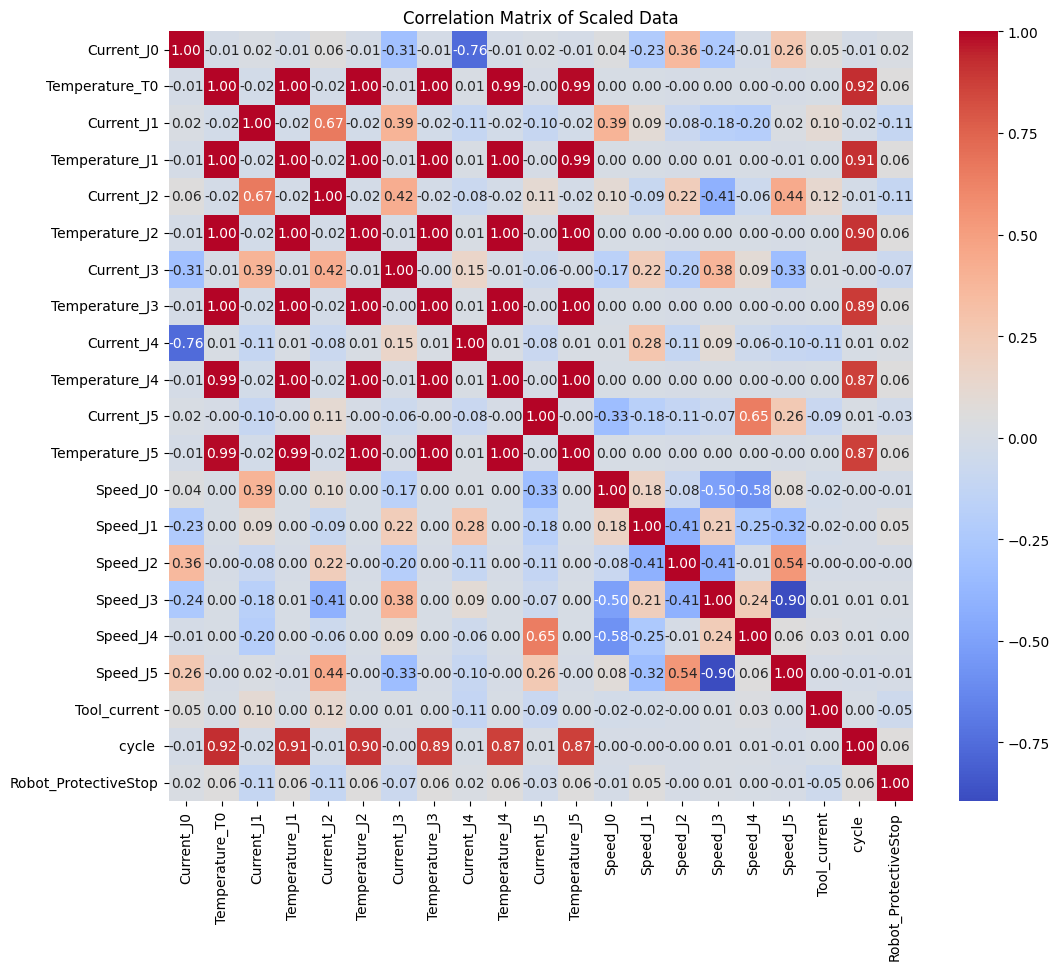

In [11]:
# prompt: check the corleation and draw a heat map

import matplotlib.pyplot as plt
correlation_matrix = data_scaled_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Scaled Data')
plt.show()


In [12]:
# # Check correlation matrix
# X_scaled = data_scaled_df.copy()
# corr_matrix = pd.DataFrame(X_scaled).corr()


# # Correlation matrix heatmap
# correlation_matrix = data_scaled_df.copy()
# plt.figure(figsize=(12, 10))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Matrix Heatmap')
# plt.show()

# # Remove highly correlated features if correlation is above a threshold


In [13]:
# Determining the optimal number of clusters
# We'll use the Elbow method and Silhouette score for this purpose

# Define a range for the number of clusters
range_n_clusters = range(2, 11)

# Lists to store inertia (for elbow) and silhouette scores
inertia = []
silhouette_avg = []

# Handle NaN values in data_scaled_df - fill with 0
data_scaled_df.fillna(0, inplace=True)

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data_scaled_df)
    inertia.append(kmeans.inertia_)  # Inertia for Elbow method
    silhouette_avg.append(silhouette_score(data_scaled_df, kmeans.labels_))  # Silhouette score

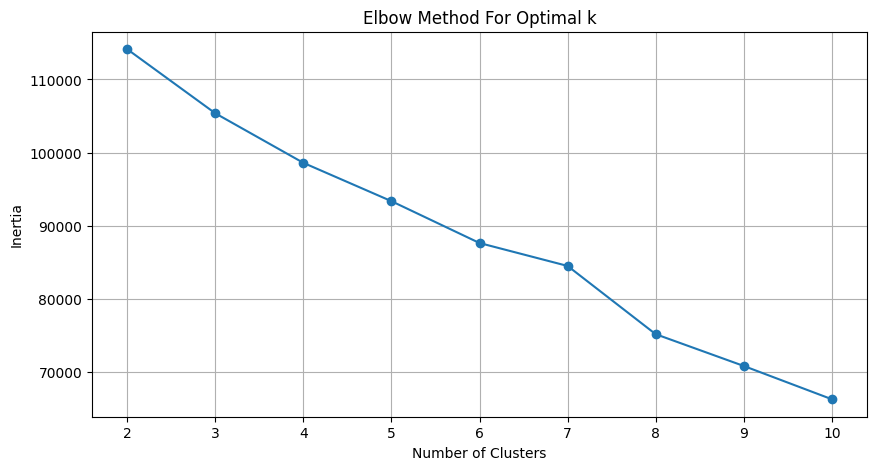

In [14]:
# Plotting the Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [15]:
from sklearn.metrics import silhouette_score
score = silhouette_score(data_scaled_df, kmeans.labels_)
print(f'Silhouette Score: {score}')

Silhouette Score: 0.28787665720436206


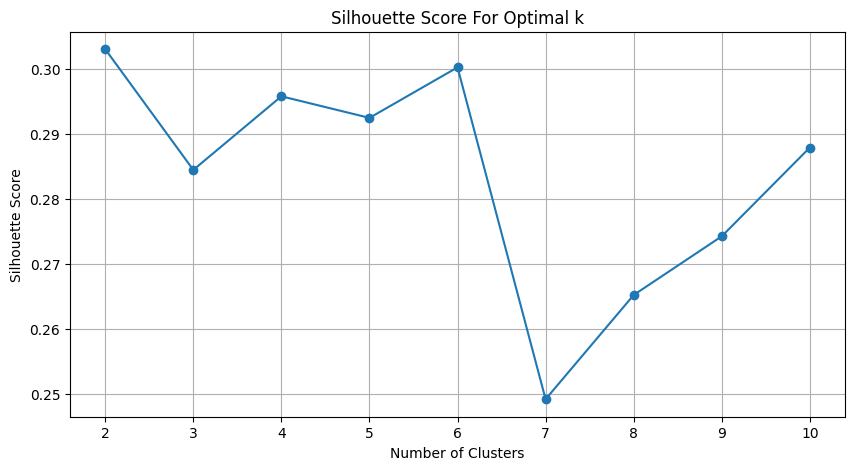

In [16]:
# Plotting the Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, silhouette_avg, marker='o')
plt.title('Silhouette Score For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

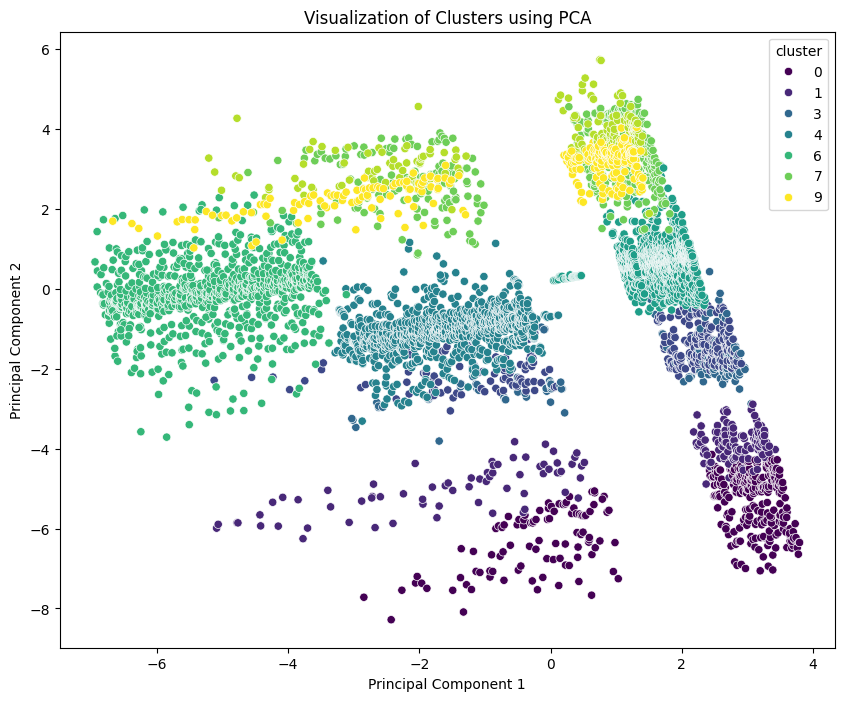

In [17]:
# prompt: vizualization of outerline

import pandas as pd
import matplotlib.pyplot as plt
# Assuming you have already performed KMeans clustering and have the labels
# Replace 'kmeans' with your actual KMeans model if needed

# Get cluster labels
labels = kmeans.labels_

# Add cluster labels to the DataFrame
data_scaled_df['cluster'] = labels

# Perform PCA for dimensionality reduction to visualize in 2D
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled_df)

# Create a DataFrame with principal components and cluster labels
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df['cluster'] = labels

# Plot the clusters in 2D
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=principal_df, palette='viridis')
plt.title('Visualization of Clusters using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [18]:
# prompt: handel the outerline

# Assuming you want to handle outliers using IQR method
def handle_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower_bound, upper_bound)
    return df

# Apply outlier handling to each column in data_scaled_df
for column in data_scaled_df.columns:
    data_scaled_df = handle_outliers_iqr(data_scaled_df, column)


# Now, data_scaled_df has outliers handled (using IQR method)

# You can continue with your KMeans clustering or other analysis
# with the modified data_scaled_df


In [19]:
# After reviewing the Elbow and Silhouette plots, choose the optimal number of clusters
optimal_clusters = 3  # Replace with your optimal value from the elbow and silhouette analysis

# Apply K-Means with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(data_scaled_df)

# Get the cluster labels
data_scaled_df['Cluster'] = kmeans.labels_

# Step 7: Evaluate the Final Clustering with Silhouette Score
final_silhouette_score = silhouette_score(data_scaled_df.drop(columns=['Cluster']), kmeans.labels_)
print(f'Final Silhouette Score: {final_silhouette_score}')

Final Silhouette Score: 0.35952642340799096


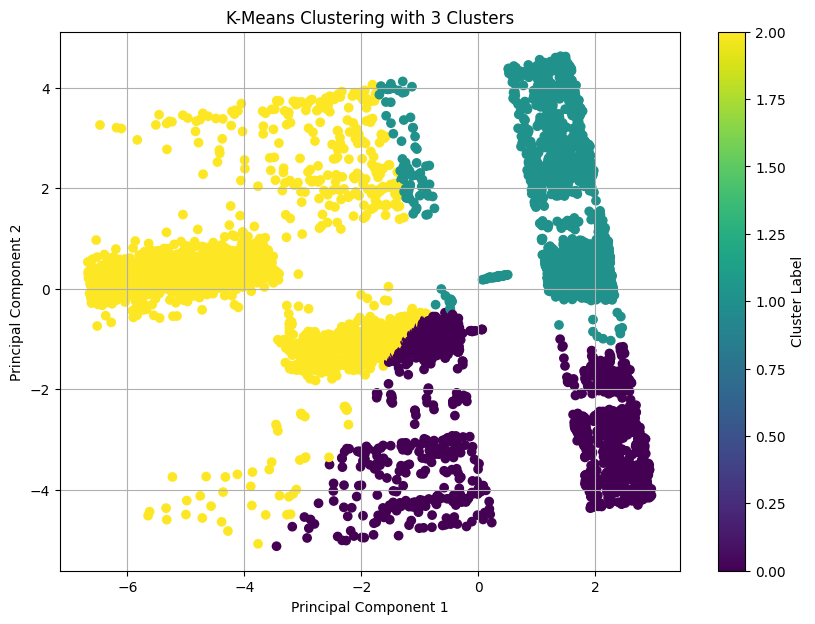

In [20]:
# Reduce data dimensions using PCA for visualization purposes (2D plot)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data_scaled_df.drop(columns=['Cluster']))

# Plot the clusters in 2D
plt.figure(figsize=(10, 7))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=data_scaled_df['Cluster'], cmap='viridis', marker='o')
plt.title(f'K-Means Clustering with {optimal_clusters} Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()

In [21]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

X_scaled = data_scaled_df.copy()

best_score = -1
best_k = 0
for k in range(2, 11):  # Try different values of k
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    if score > best_score:
        best_score = score
        best_k = k

print(f"Best number of clusters: {best_k} with silhouette score: {best_score}")


Best number of clusters: 2 with silhouette score: 0.40447352758120847


In [22]:
# prompt: write a code for clustering where ckuster is 2

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming data_scaled_df is your standardized DataFrame

# Set the number of clusters to 2
n_clusters = 2

# Apply K-Means with 2 clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(data_scaled_df)

# Get the cluster labels
data_scaled_df['Cluster'] = kmeans.labels_

# Evaluate the clustering with Silhouette Score
silhouette_avg = silhouette_score(data_scaled_df.drop(columns=['Cluster']), kmeans.labels_)
print(f'Silhouette Score with 2 clusters: {silhouette_avg}')

# You can further analyze the clusters (e.g., visualize them with PCA)
# as demonstrated in the previous code.


Silhouette Score with 2 clusters: 0.3943801928346318


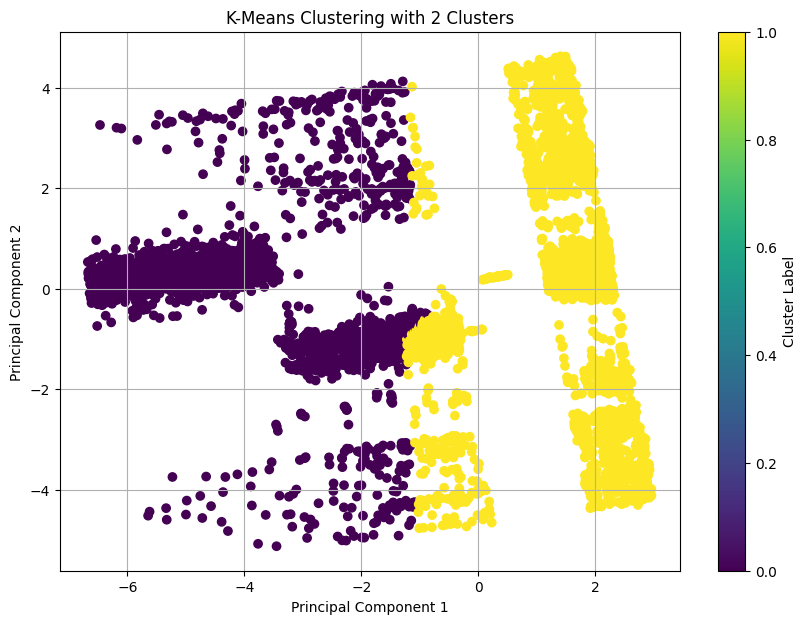

In [23]:
# prompt: visualize them with PCA)

import matplotlib.pyplot as plt
# Reduce data dimensions using PCA for visualization purposes (2D plot)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data_scaled_df.drop(columns=['Cluster']))

# Plot the clusters in 2D
plt.figure(figsize=(10, 7))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=data_scaled_df['Cluster'], cmap='viridis', marker='o')
plt.title(f'K-Means Clustering with {n_clusters} Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()
